# Titanic Survival Prediction using Logistic Regression

In [1]:

import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This loads the Titanic dataset into a DataFrame for analysis.

In [16]:
print(df.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [17]:
df.columns = df.columns.str.strip()


Missing values are handled using median and mode to maintain data consistency.

In [3]:

df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)


Unnecessary columns that do not help prediction are removed.

In [4]:

df = pd.get_dummies(df, drop_first=True)


Categorical variables are converted into numeric form using One-Hot Encoding.

In [5]:

X = df.drop(columns=["Survived"])
y = df["Survived"]


Features and target variable are separated for model training.

In [6]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[["Age", "Fare"]] = scaler.fit_transform(X[["Age", "Fare"]])


Numerical features are scaled to improve training stability.

In [7]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Data is split into training and testing sets while preserving class balance.

In [8]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


A Logistic Regression model is trained on the training dataset.

In [9]:

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


Predictions and probabilities are generated for evaluation.

In [10]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1


(0.8044692737430168,
 0.7931034482758621,
 0.6666666666666666,
 0.7244094488188977)

These metrics evaluate model correctness, reliability, sensitivity, and balance.

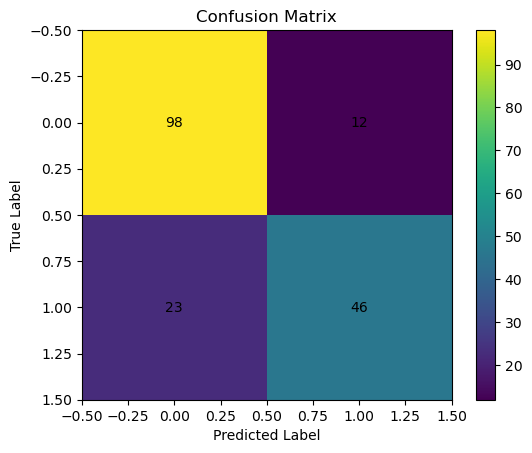

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


The confusion matrix shows correct and incorrect survival predictions.

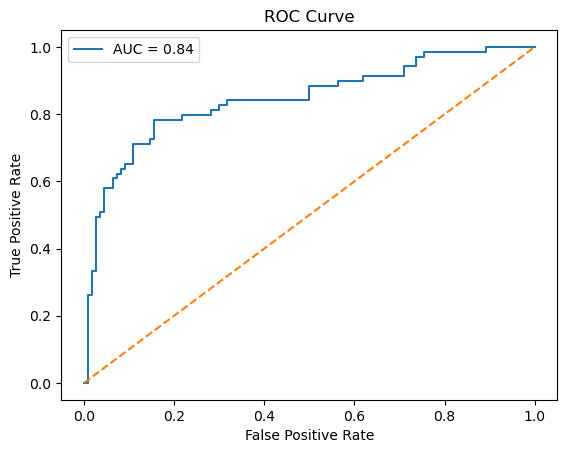

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


ROC curve and AUC score measure the model’s overall classification ability.